In [1]:
%matplotlib inline
import pandas as pd
from sklearn import preprocessing as scale
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.utils import resample
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, roc_curve, average_precision_score, precision_recall_curve, precision_score,f1_score
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_auc_score as AUC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from threading import Lock, Thread
from sklearn.decomposition import PCA


In [2]:
lock = Lock()
accuracy_values = list()
accuracy_columns = list()
recall_values = list()
recall_columns = list()
precision_values = list()
precision_columns = list()
average_precision_values = list()
average_precision_columns = list()
f1_values = list()
f1_columns = list()
prob_pos = pd.DataFrame()

#loading csv file into python
dataset = pd.read_csv('./device_failure.csv',encoding='unicode_escape')

In [3]:
dataset.head(100)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
5,2015-01-01,S1F01TD5,0,68837488,0,0,41,6,413535,0,0,1
6,2015-01-01,S1F01XDJ,0,227721632,0,0,0,8,402525,0,0,0
7,2015-01-01,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3
8,2015-01-01,S1F02A0J,0,8217840,0,1,0,14,311869,0,0,0
9,2015-01-01,S1F02DZ2,0,116440096,0,323,9,9,407905,0,0,164


In [4]:
dataset.dtypes

date          object
device        object
failure        int64
attribute1     int64
attribute2     int64
attribute3     int64
attribute4     int64
attribute5     int64
attribute6     int64
attribute7     int64
attribute8     int64
attribute9     int64
dtype: object

In [5]:
le = scale.LabelEncoder()
dataset['device'] = le.fit_transform(dataset['device'])
#dataset['date'] = le.fit_transform(dataset['date'])
dataset['date'] = pd.to_datetime(dataset['date'])

dataset.dropna(axis=0,inplace=True)
dataset.dtypes

date          datetime64[ns]
device                 int32
failure                int64
attribute1             int64
attribute2             int64
attribute3             int64
attribute4             int64
attribute5             int64
attribute6             int64
attribute7             int64
attribute8             int64
attribute9             int64
dtype: object

In [6]:
dataset.describe()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,622.379191,0.000851,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,327.177800,0.029167,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,378.000000,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,602.000000,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,917.000000,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1168.000000,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [7]:
def corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''
    
    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns))
    drop_cols = []
    
    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i):(i+1)]
            col = item.columns
            row = item.index
            val = item.values
            if val >= corr_val:
                # Prints the correlated feature set and the corr val
                print("Related columns have been found " , col.values[0], "|", row.values[0], "| with correlation coeficient ", round(val[0][0], 2))
                print("Removing column ", col.values[0], " from dataset")
                drop_cols.append(col.values[0])
  

    # Drops the correlated columns
    df = x.drop(drop_cols, axis=1)
    return df

In [8]:
data = corr_df (dataset,0.8)
data.describe()

Related columns have been found  attribute8 | attribute7 | with correlation coeficient  1.0
Removing column  attribute8  from dataset


,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
count,124494.000000,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,622.379191,0.000851,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,12.451524
std,327.177800,0.029167,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,191.425623
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000
25%,378.000000,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000
50%,602.000000,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000
75%,917.000000,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000
max,1168.000000,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,18701.000000


c:\users\lbazoga\appdata\local\programs\python\python36-32\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


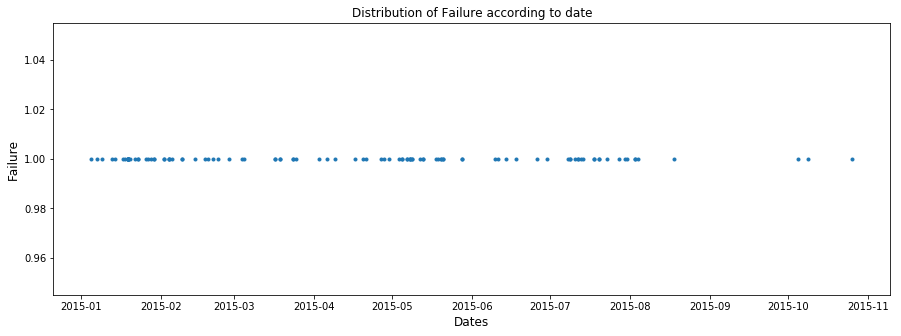

In [9]:
Failure = data[data.failure==1]
#dataWithNoFailure = data.drop(['failure'], axis=1)
#iters = range(len(dataWithNoFailure.columns))
notRelevantColumns = ['failure']
    
#Data analysis on date feature
plt.figure(figsize=(15,5))
plt.plot(Failure['date'].sort_values(),Failure['failure'],".")
plt.title("Distribution of Failure according to date")
plt.ylabel('Failure', fontsize=12)
plt.xlabel('Dates', fontsize=12)

#Remove date, assuming is installation, as it does not have any relation with the output
#It has been included categorized in model and we've got worse results
notRelevantColumns.extend(['date'])


In [10]:
def MajorityClassIsBalanced (data,feature):
    for i in data[feature].value_counts(normalize=True).tolist():
        if (i < 0.6):
            return False

In [11]:

if not MajorityClassIsBalanced (data,'failure'):
    
    #very low majority class occurrences -> downsampling data.
    df_nonfailure = data[data['failure'] == 0]
    df_failure = data[data['failure']==1]
    df_nonfailure_downsample = resample(df_nonfailure,replace=False,n_samples = 106,\
                                        random_state=23)
    df_resampled = pd.concat([df_nonfailure_downsample,df_failure])

    data_Outcome = df_resampled['failure']
    #scaling cat and cont data
    

    #dropping unwanted columns
    #That needs to be validated with customer as they might want to keep some of them
    df_resampled = df_resampled.drop(notRelevantColumns,axis = 1)
    standard_sc = scale.StandardScaler()
    x_std = standard_sc.fit_transform(df_resampled)
    data_scaled = pd.DataFrame(x_std)
    
    #pca = PCA()
    #principalComponents = pca.fit_transform(data_scaled)
    #principalDf = pd.DataFrame(data = principalComponents)
    #print (pca.explained_variance_ratio_)
    
    #split data into test and train
    xtrain,xtest,ytrain,ytest = train_test_split(data_scaled,data_Outcome,test_size=0.25,random_state =19)
    #xtrain,xtest,ytrain,ytest = train_test_split(principalDf,data_Outcome,test_size=0.25,random_state =19)
else:
    #dropping unwanted columns
    #That needs to be validated with customer as they might want to keep some of them
    data = data.drop(notRelevantColumns,axis = 1)
    standard_sc = scale.StandardScaler()
    x_std = standard_sc.fit_transform(data)
    data = pd.DataFrame(x_std)
    
    #pca = PCA()
    #principalComponents = pca.fit_transform(data)
    #principalDf = pd.DataFrame(data = principalComponents)
    #print (pca.explained_variance_ratio_)
    
    #split data into test and train
    xtrain,xtest,ytrain,ytest = train_test_split(data,data['failure'],test_size=0.25,random_state =19)

c:\users\lbazoga\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\lbazoga\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [12]:
def runModel (model,model_name, xtrain, ytrain, xtest):
    
    model_dt = model.fit(xtrain,ytrain)
    pred_dt=model_dt.predict(xtest)
    #Metrics(ytest,pred_dt)
    global accuracy_values
    global accuracy_columns
    global recall_values
    global recall_columns
    global precision_values
    global precision_columns
    global average_precision_values
    global average_precision_columns
    global f1_values
    global f1_columns
    global prob_pos
    lock.acquire()
    accuracy_values.append(accuracy_score(ytest,pred_dt))
    accuracy_columns.append(model_name)
    recall_values.append(recall_score(ytest,pred_dt))
    recall_columns.append(model_name)
    precision_values.append(precision_score(ytest,pred_dt))
    precision_columns.append(model_name)
    f1_values.append(f1_score(ytest,pred_dt))
    f1_columns.append(model_name)
    average_precision_values.append(average_precision_score(ytest,pred_dt))
    average_precision_columns.append(model_name)
    if hasattr(model_dt, "predict_proba"):
        prob_pos[model_name] = model_dt.predict_proba(xtest)[:, 1]
    else:  # use decision function
        prob_pos[model_name] = model_dt.decision_function(xtest)
        prob_pos[model_name] = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    
    #print("********************** ", model_name, "*************************")
    #print(model_name, 'accuracy:', accuracy_score(ytest,pred_dt),',recall score:',recall_score(ytest,pred_dt))
    #print(model_name, 'precision: ', precision_score(ytest,pred_dt), ',av_precision_score: ', average_precision_score(ytest,pred_dt), ',f1_score: ', f1_score(ytest,pred_dt))
    #print(model_name, "\n", confusion_matrix(ytest,pred_dt))
    lock.release()
    #print(model_dt.feature_importances_ )


In [13]:
def plot_metrics (name, x, y):
    
    
    metric = pd.DataFrame({'x': x, 'y': y})
    metric.sort_values(by='y',ascending=False,inplace=True)
    print ("*******Metric ", name , " ************\n",metric)

    # Plot the figure.
    plt.figure(figsize=(12, 8))
    ax = metric.y.plot(kind='barh')
    ax.set_title(name)
    ax.set_xlabel('Model')
    ax.set_ylabel(name)
    ax.set_yticklabels(metric.x)
    ax.set_xlim(0, 1) # expand xlim to make labels easier to read

    rects = ax.patches

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        ha = 'left'

        # If value of bar is negative: Place label left of bar
        if x_value < 0:
            # Invert space to place label to the left
            space *= -1
            # Horizontally align label at right
            ha = 'right'

        # Use X value as label and format number with one decimal place
        label = "{:.5f}".format(x_value)

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(space, 0),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
            ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.
    plt.show()

c:\users\lbazoga\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


*******Metric  Accuracy  ************
                    x         y
4      Decision_Tree  0.886792
7           AdaBoost  0.867925
5      Random_Forest  0.830189
9                QDA  0.811321
8        Naive_Bayes  0.773585
3   Gaussian_Process  0.716981
6         Neural_Net  0.698113
0  Nearest_Neighbors  0.528302
2            RBF_SVM  0.528302
1         Linear_SVM  0.471698


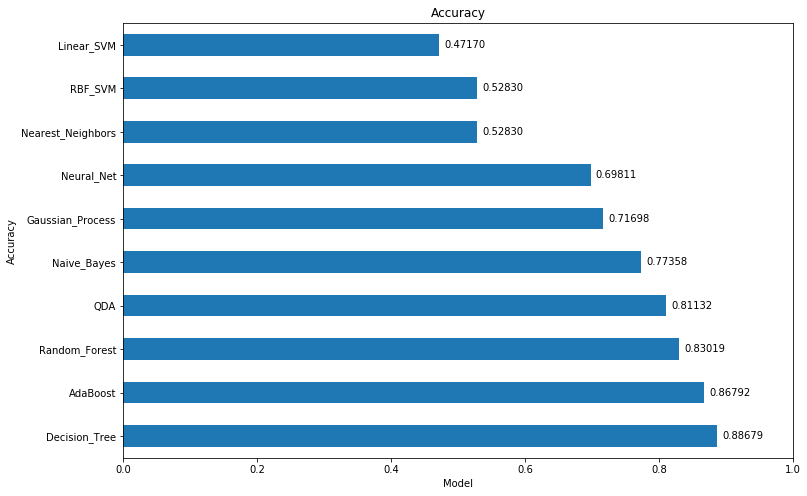

*******Metric  Recall  ************
                    x         y
4      Decision_Tree  0.793103
7           AdaBoost  0.793103
5      Random_Forest  0.724138
9                QDA  0.655172
8        Naive_Bayes  0.586207
3   Gaussian_Process  0.551724
6         Neural_Net  0.517241
2            RBF_SVM  0.482759
0  Nearest_Neighbors  0.379310
1         Linear_SVM  0.034483


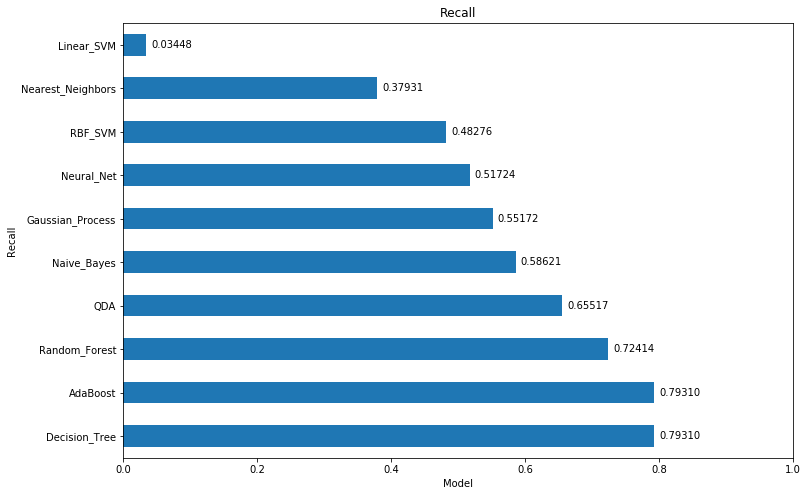

*******Metric  F1  ************
                    x         y
4      Decision_Tree  0.884615
7           AdaBoost  0.867925
5      Random_Forest  0.823529
9                QDA  0.791667
8        Naive_Bayes  0.739130
3   Gaussian_Process  0.680851
6         Neural_Net  0.652174
2            RBF_SVM  0.528302
0  Nearest_Neighbors  0.468085
1         Linear_SVM  0.066667


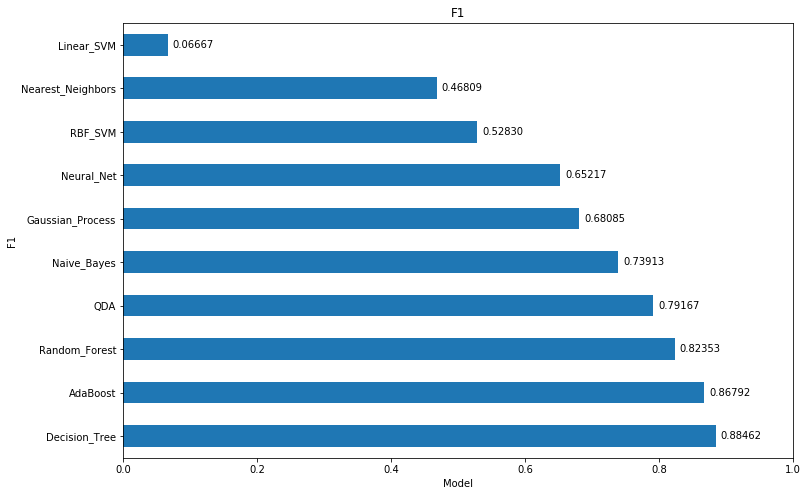

*******Metric  Average Precision  ************
                    x         y
4      Decision_Tree  0.906311
7           AdaBoost  0.873265
9                QDA  0.843852
5      Random_Forest  0.842166
8        Naive_Bayes  0.812622
3   Gaussian_Process  0.735704
6         Neural_Net  0.720540
0  Nearest_Neighbors  0.571423
2            RBF_SVM  0.564628
1         Linear_SVM  0.562785


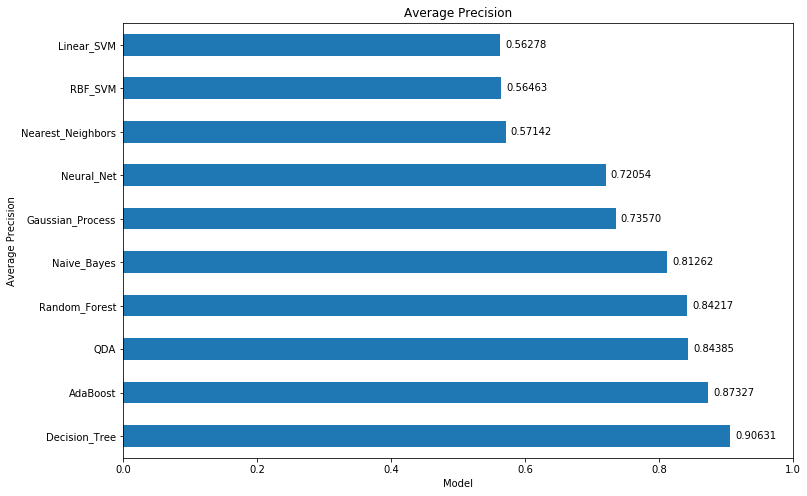

*******Metric  Presision  ************
                    x         y
1         Linear_SVM  1.000000
4      Decision_Tree  1.000000
8        Naive_Bayes  1.000000
9                QDA  1.000000
7           AdaBoost  0.958333
5      Random_Forest  0.954545
3   Gaussian_Process  0.888889
6         Neural_Net  0.882353
0  Nearest_Neighbors  0.611111
2            RBF_SVM  0.583333


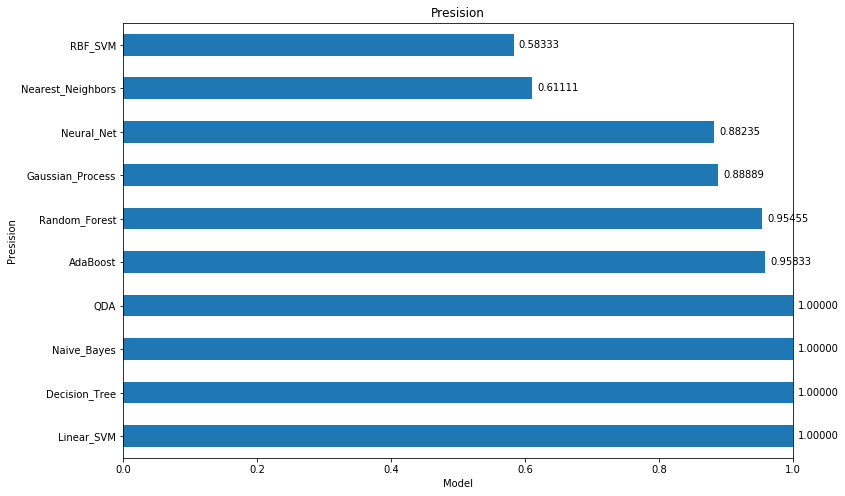

In [14]:
model_names = ["Nearest_Neighbors", "Linear_SVM", "RBF_SVM", "Gaussian_Process",
         "Decision_Tree", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA"]
models = [    
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
threads = list()


for model,model_name in zip(models,model_names):
    t = Thread(target=runModel, args=(model,model_name,xtrain,ytrain,xtest))
    threads.append(t)
    t.start()
    t.join()


plot_metrics("Accuracy",accuracy_columns,accuracy_values)
plot_metrics("Recall", recall_columns, recall_values)
plot_metrics("F1", f1_columns, f1_values)
plot_metrics("Average Precision", average_precision_columns, average_precision_values)
plot_metrics("Presision", precision_columns, precision_values)



   

In [17]:
def checkModelCalibration(X_train,X_test, y_train,y_test,models,model_name):
    
    plt.figure(figsize=(20, 20))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf,name in zip(models,model_names):
        fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos[name], n_bins=5)
    
        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s" % (name, ))
    
    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')
    
    plt.tight_layout()
    plt.show()

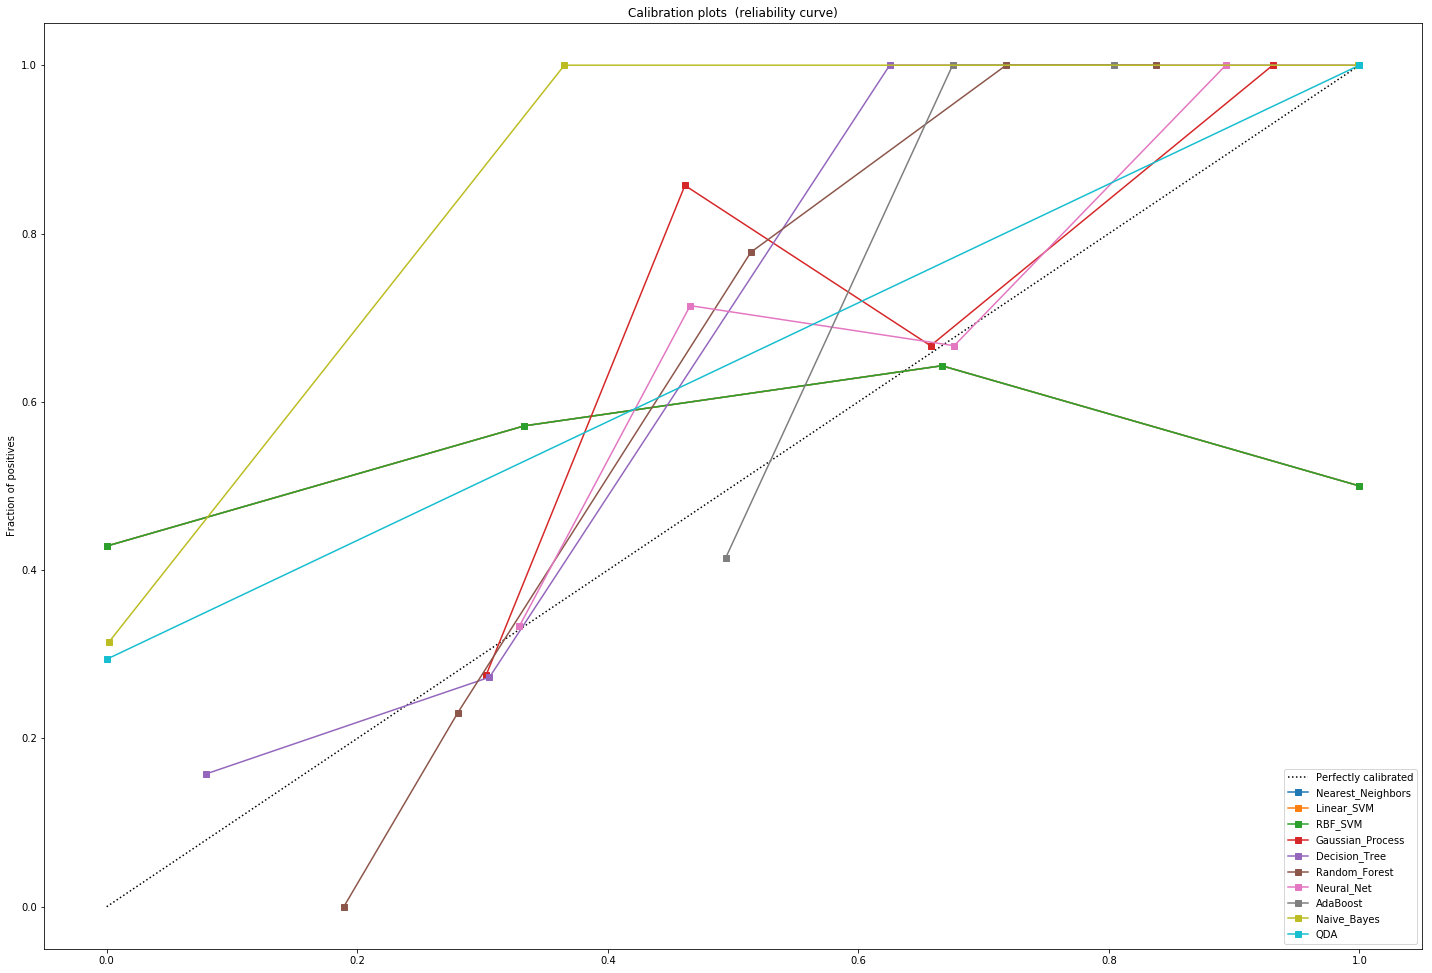

In [18]:
checkModelCalibration(xtrain,xtest, ytrain,ytest,models,model_name)
#Decision tree and random forest are perhabs giving the best results among all. 
#Although I think models can be improved if provided with more failure data